# Analyzing Customer Purchasing Patterns

Objectives: 
1. What are the SKUs our first-time customers typically buy?
2. How long does it usually take our first-time customers to re-purchase?

Steps involved:
1. Import Shopify-Orders CSV (dated 2018-02-07)
2. Convert date columns into datetime format
3. Obtain a unique list of all transactions using 'Email' and 'Paid at' columns
4. Using Pandas' 'groupby' method:
    1. serialize each customer's purchases
    2. create a column called "Previous Transaction" for each customer
    3. create another column to calculate the amount of time between two consecutive purchases
5. Calculate the mean, median days using the "Days Between" column

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifetimes as life
import seaborn as sb
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [107]:
sales_data = pd.read_csv("D:\Code\CLTV\shopify_orders_export_20180326.csv", low_memory=False )
sales_data['Paid at'] = pd.to_datetime(sales_data['Paid at'])
sales_data['Fulfilled at'] = pd.to_datetime(sales_data['Fulfilled at'])
sales_data['Created at'] = pd.to_datetime(sales_data['Created at'])
# sales_data.info()
sales_data_clean = sales_data.drop(sales_data.columns.to_series()[-11:-1], axis=1).sort_values('Paid at', ascending = True)

# remove useless emails
email_list = ['wytanj@gmail.com', 'raied.r@paulaschoice.sg', 'raied.rahman@gmail.com']
sales_data_clean = sales_data_clean[~sales_data_clean['Email'].isin(email_list)]

In [153]:
sales_data_group = sales_data_clean[['Email', 'Paid at', 'Total']].dropna()
sales_data_group['Purchase Count'] = sales_data_group.groupby(['Email']).cumcount()+1
sales_data_group['Earliest Transaction'] = sales_data_group.groupby('Email')['Paid at'].transform(lambda x: x.min())
sales_data_group['first last gap'] = sales_data_group.groupby('Email')['Paid at'].transform(lambda x: (x.max()-x.min()).days)
sales_data_group['last today gap'] = sales_data_group.groupby('Email')['Paid at'].transform(lambda x: -(x.max()-np.datetime64('2018-04-05')).days)
sales_data_group['status'] = sales_data_group['last today gap'].apply(lambda x: 'alive' if x< 365 else 'dead')
sales_data_group

,Email,Paid at,Total,Purchase Count,Earliest Transaction,first last gap,last today gap,status
33153,limlixiaa@gmail.com,2016-11-30 11:26:42,7.0,1,2016-11-30 11:26:42,234,256,alive
33148,anradmacher@hotmail.com,2016-12-01 04:52:39,225.0,1,2016-12-01 04:52:39,0,490,dead
33138,chinyingqi@gmail.com,2016-12-01 17:50:16,141.0,1,2016-12-01 17:50:16,461,29,alive
33135,emilymancer@gmail.com,2016-12-01 23:14:15,109.0,1,2016-12-01 23:14:15,0,490,dead
33132,rogini611@gmail.com,2016-12-02 00:09:10,153.0,1,2016-12-02 00:09:10,456,33,alive
33131,ms.sue.adams@gmail.com,2016-12-02 02:34:24,88.0,1,2016-12-02 02:34:24,0,489,dead
33130,Stuzzy1973@hotmail.com,2016-12-02 02:40:06,88.0,1,2016-12-02 02:40:06,0,489,dead
33129,yewsoonsiong@gmail.com,2016-12-02 03:48:13,48.0,1,2016-12-02 03:48:13,20,469,dead
33122,ada.wong@rocketmail.com,2016-12-02 04:12:11,75.5,1,2016-12-02 04:12:11,0,489,dead
33118,payg17@yahoo.com,2016-12-02 04:57:04,92.0,1,2016-12-02 04:57:04,380,109,alive


In [186]:
customer_purchase_timing = sales_data_group.drop_duplicates(subset = 'Email', keep='last')
repeat_customer_purchase_timing = customer_purchase_timing[customer_purchase_timing['first last gap']>0]
repeat_customer_purchase_timing[repeat_customer_purchase_timing['status'] == 'dead']

,Email,Paid at,Total,Purchase Count,Earliest Transaction,first last gap,last today gap,status
32380,linkto@gmail.com,2016-12-12 07:39:01,293.0,2,2016-12-09 06:08:22,3,479,dead
32164,nishasiraj1505@gmail.com,2016-12-15 09:47:55,42.0,2,2016-12-13 09:41:57,2,476,dead
32083,nur_lady@hotmail.com,2016-12-16 05:51:56,128.0,2,2016-12-11 05:43:26,5,475,dead
31949,kopila_thapa81@hotmail.com,2016-12-18 07:59:33,59.0,2,2016-12-13 06:33:44,5,473,dead
31635,phua.wenting@gmail.com,2016-12-21 16:12:02,111.0,2,2016-12-10 04:34:43,11,470,dead
31623,maridel15@yahoo.com,2016-12-22 03:37:55,45.0,2,2016-12-09 05:06:03,12,469,dead
31577,yewsoonsiong@gmail.com,2016-12-22 07:21:22,185.0,2,2016-12-02 03:48:13,20,469,dead
31414,azman_master@hotmail.com,2016-12-24 09:27:22,73.0,2,2016-12-19 14:48:33,4,467,dead
31330,yansulove@hotmail.com,2016-12-25 15:20:31,81.0,2,2016-12-21 15:09:10,4,466,dead
31262,jadecmy@hotmail.com,2016-12-26 17:45:12,235.0,2,2016-12-03 10:44:29,23,465,dead


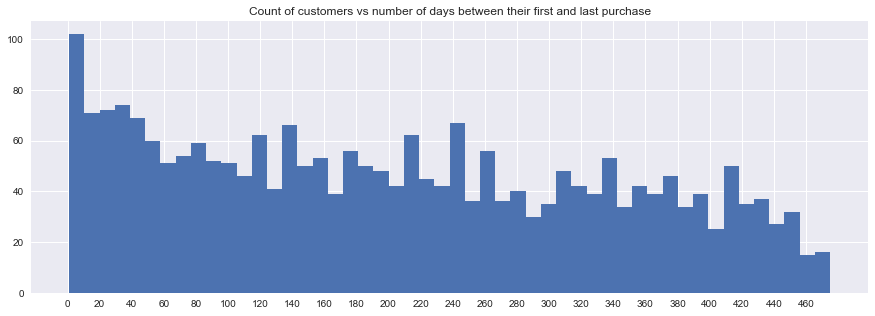

In [182]:
repeat_customer_purchase_timing['first last gap'].hist(figsize = (15,5), bins=50, xlabelsize= 10)
plt.xticks(np.arange(0,480, 20))
plt.title('Count of customers vs number of days between their first and last purchase')

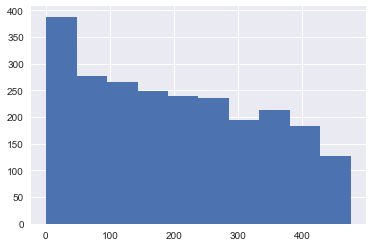

In [183]:
# examine the huge bar on top, consisting customers who made their the first and last purchase within 80 days
repeat_customer_purchase_timing['first last gap'].hist()

Count of customers who have not purchased in the last 365 days: 953
Count of customers who purchased in the last 365 days: 4771
Percentage of customers who have not bought in 365 days: 0.20%


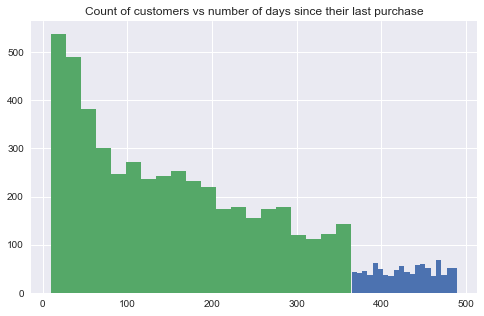

In [185]:
# Calculate the proportion of customers who have been inactive for over 365 days
count_over_365 = customer_purchase_timing[customer_purchase_timing['last today gap'] >= 365]['last today gap'].count()
count_below_365 = customer_purchase_timing[customer_purchase_timing['last today gap'] < 365]['last today gap'].count()

customer_purchase_timing[customer_purchase_timing['last today gap'] >= 365]['last today gap'].hist(figsize = (8,5), bins= 20)
customer_purchase_timing[customer_purchase_timing['last today gap'] < 365]['last today gap'].hist(figsize = (8,5), bins= 20)
plt.title('Count of customers vs number of days since their last purchase')

print('Count of customers who have not purchased in the last 365 days: {:0}'.format(count_over_365))
print('Count of customers who purchased in the last 365 days: {:0}'.format(count_below_365))
print('Percentage of customers who have not bought in 365 days: {:0.2f}%'.format(count_over_365/count_below_365))


In [171]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = customer_purchase_timing['first last gap']
E = customer_purchase_timing['status'].apply(lambda x: '0' if x == 'alive' else '1')
kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 5724 observations, 4771 censored>

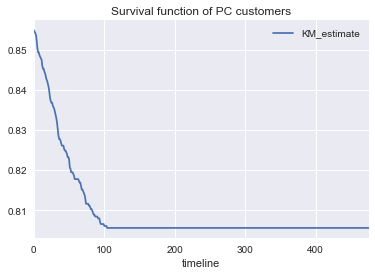

In [172]:
kmf.survival_function_.plot()
plt.title('Survival function of PCSG customers');

y-axis represents the probability the customer is still alive after t days, where t years is on the x-axis. We see that very few leaders make it past 120 days

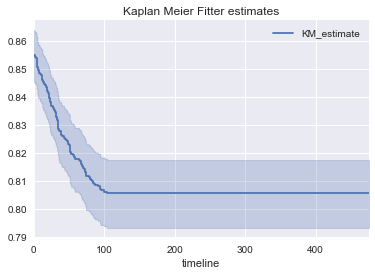

In [177]:
# we now plot on the KaplanMeierFitter itself to plot both the KM estimate and its confidence intervals:
kmf.plot()
plt.title('Kaplan Meier Fitter estimates')

inf

In [164]:
plt.barh(bottom = range(len(customer_purchase_timing['Earliest Transaction'])), 
         width = pd.to_datetime(customer_purchase_timing['Paid at'] - customer_purchase_timing['Earliest Transaction'].timestamp(),
        left = customer_purchase_timing['Earliest Transaction'].timestamp())

AttributeError: 'Series' object has no attribute 'timestamp'

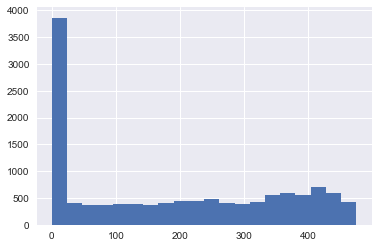

In [53]:
import matplotlib.pyplot as plt
sales_data_group.sort_values(['Email', 'Paid at'])
sales_data_group['days since start'].hist(bins = 20)

In [152]:
import lifelines

In [4]:
customer_emails = sales_data_clean[['Email', 'Paid at']].drop_duplicates()
# customer_emails.Email.dropna(inplace=True)
customer_emails.dropna(inplace=True)

In [5]:
customer_emails.sort_values('Paid at', inplace=True)
customer_emails['Previous Transaction'] = customer_emails.groupby(['Email'])['Paid at'].shift()
customer_emails['Days Between'] = customer_emails['Paid at'] - customer_emails['Previous Transaction']
# to test
# customer_emails[(customer_emails['Email'] == "lavie_ind@yahoo.com" )| (customer_emails['Email'] == "wytanj@gmail.com" )]

# converts the time difference into integer days
customer_emails['Days Between Int'] = (customer_emails['Days Between'].dropna()/ np.timedelta64(1, "D")).astype(int)
customer_emails['Buy Count'] = customer_emails.groupby(['Email'])['Paid at'].cumcount()+1

In [6]:
customer_emails['Days Between'].describe()

count                       5824
mean     67 days 05:36:31.129807
std      66 days 16:35:38.135738
min              0 days 00:00:02
25%      20 days 00:32:23.750000
50%             47 days 16:19:53
75%      90 days 23:46:21.250000
max            414 days 23:01:47
Name: Days Between, dtype: object

# Plotting

The following graphic shows the frequency plot of the number of days between purchases. 
The first shows a kernel density estimate plot that estimates the probability density function of a random variable, with the probability value on the y-axis.
The second plot shows only the frequency plot, with the number of occurences as the y-axis

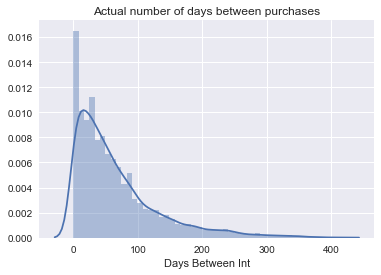

In [7]:
to_plot = customer_emails[['Email', 'Days Between Int']]
plt.title("Actual number of days between purchases")
sb.distplot(to_plot['Days Between Int'].dropna())
# plt.savefig('Actual number of days between purchases')

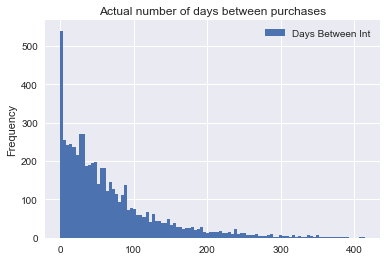

In [8]:
to_plot.plot.hist(by='Days Between Int', bins=100);
plt.title("Actual number of days between purchases")
# plt.savefig('Days Between Purchases Chart.png')

In [9]:
# customer_emails.to_excel("Customer Re-Purchase Time Gap.xlsx")

This KDE plot presents a different value in the y-axis because of the "mean" aggfunc used in pivot table smoothened the distribution of the values

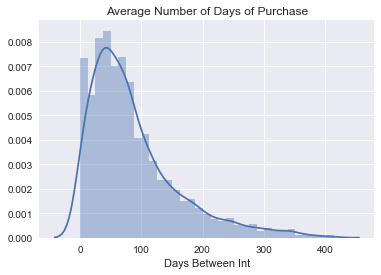

In [10]:
average_buy_days = customer_emails.pivot_table(index='Email', values='Days Between Int', aggfunc='mean').dropna().reset_index()
average_buy_days.sort_values('Days Between Int', inplace=True)
sb.distplot(a=average_buy_days['Days Between Int'])
plt.title("Average Number of Days of Purchase")
plt.savefig('Average Number of Days of Purchase.png')